In [20]:
import pandas as pd
import pandas as pd
import numpy as np
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing 
from sklearn.feature_selection import RFECV
import textstat


#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [21]:
df_mobile = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.tsv', sep='\t', error_bad_lines=False)

b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


In [22]:
df_mobile.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [24]:
# Product titles

df_mobile['product_title'].value_counts()

iXCC Lightning Cable 3ft, iPhone charger, for iPhone X, 8, 8 Plus, 7, 7 Plus, 6s, 6s Plus, 6, 6 Plus, SE 5s 5c 5, iPad Air 2 Pro, iPad mini 2 3 4, iPad 4th Gen [Apple MFi Certified](Black and White)                                                                                                                                                                                     1078
Wall AC Charger USB Sync Data Cable for iPhone 4, 3GS, and iPod                                                                                                                                                                                                                                                                                                                             730
New Trent Easypak 7000mAh Portable Triple USB Port External Battery Charger/Power Pack for Smartphones, Tablets and more (w/built-in USB cable)                                                                                         

In [25]:
# Product category
df_mobile['product_category'].value_counts()

Mobile_Electronics    104850
2013-01-06                 1
2013-02-01                 1
Name: product_category, dtype: int64

In [26]:
# peek look on the review body
df_mobile['review_body'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              120
good                                                              

In [4]:
# Vine members are category of expert reviewer of products and services on Amazon
df_mobile['vine'].value_counts()

N    104832
Y        18
Name: vine, dtype: int64

In [5]:
# Reviews from verified purchasers are considered more unique and valid
df_mobile['verified_purchase'].value_counts()

Y    88394
N    16456
Name: verified_purchase, dtype: int64

In [6]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104852 non-null  object 
 1   customer_id        104852 non-null  int64  
 2   review_id          104852 non-null  object 
 3   product_id         104852 non-null  object 
 4   product_parent     104852 non-null  int64  
 5   product_title      104852 non-null  object 
 6   product_category   104852 non-null  object 
 7   star_rating        104850 non-null  float64
 8   helpful_votes      104850 non-null  float64
 9   total_votes        104850 non-null  float64
 10  vine               104850 non-null  object 
 11  verified_purchase  104850 non-null  object 
 12  review_headline    104848 non-null  object 
 13  review_body        104849 non-null  object 
 14  review_date        104850 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

In [7]:
df_mobile.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.048520e+05,1.048520e+05,104850.000000,104850.000000,104850.000000
mean,2.793783e+07,5.015196e+08,3.763176,1.243996,1.615393
std,1.508722e+07,2.871661e+08,1.523526,7.070387,7.909896
min,1.007100e+04,5.352400e+04,1.000000,0.000000,0.000000
25%,1.471402e+07,2.593731e+08,3.000000,0.000000,0.000000
50%,2.650357e+07,4.937289e+08,4.000000,0.000000,0.000000
75%,4.223551e+07,7.440083e+08,5.000000,1.000000,1.000000
max,5.309657e+07,9.999508e+08,5.000000,769.000000,791.000000


In [8]:
df_mobile['verified_purchase'].value_counts()

Y    88394
N    16456
Name: verified_purchase, dtype: int64

In [9]:
# sum of Missing value
df_mobile.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          3
review_date          2
dtype: int64

In [10]:
df_mobile.dropna(subset=['review_body','review_headline'], inplace=True)

In [11]:
# Checking after dropping
df_mobile.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [12]:
df_mobile.shape

(104847, 15)

### Data Visualization

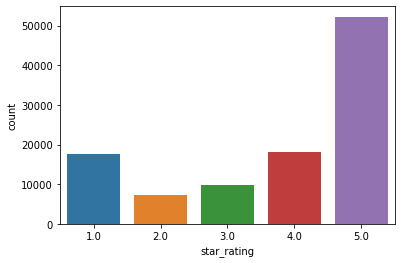

In [13]:
#Let Visualise ratings, from 1 star to 5star
sns.countplot(x = 'star_rating', data= df_mobile)

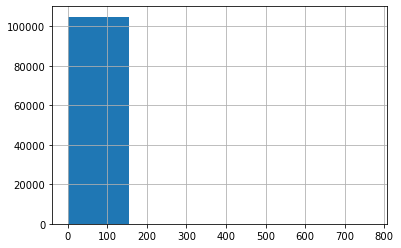

In [14]:
#Let Visualise 
df_mobile['helpful_votes'].hist(bins = 5)

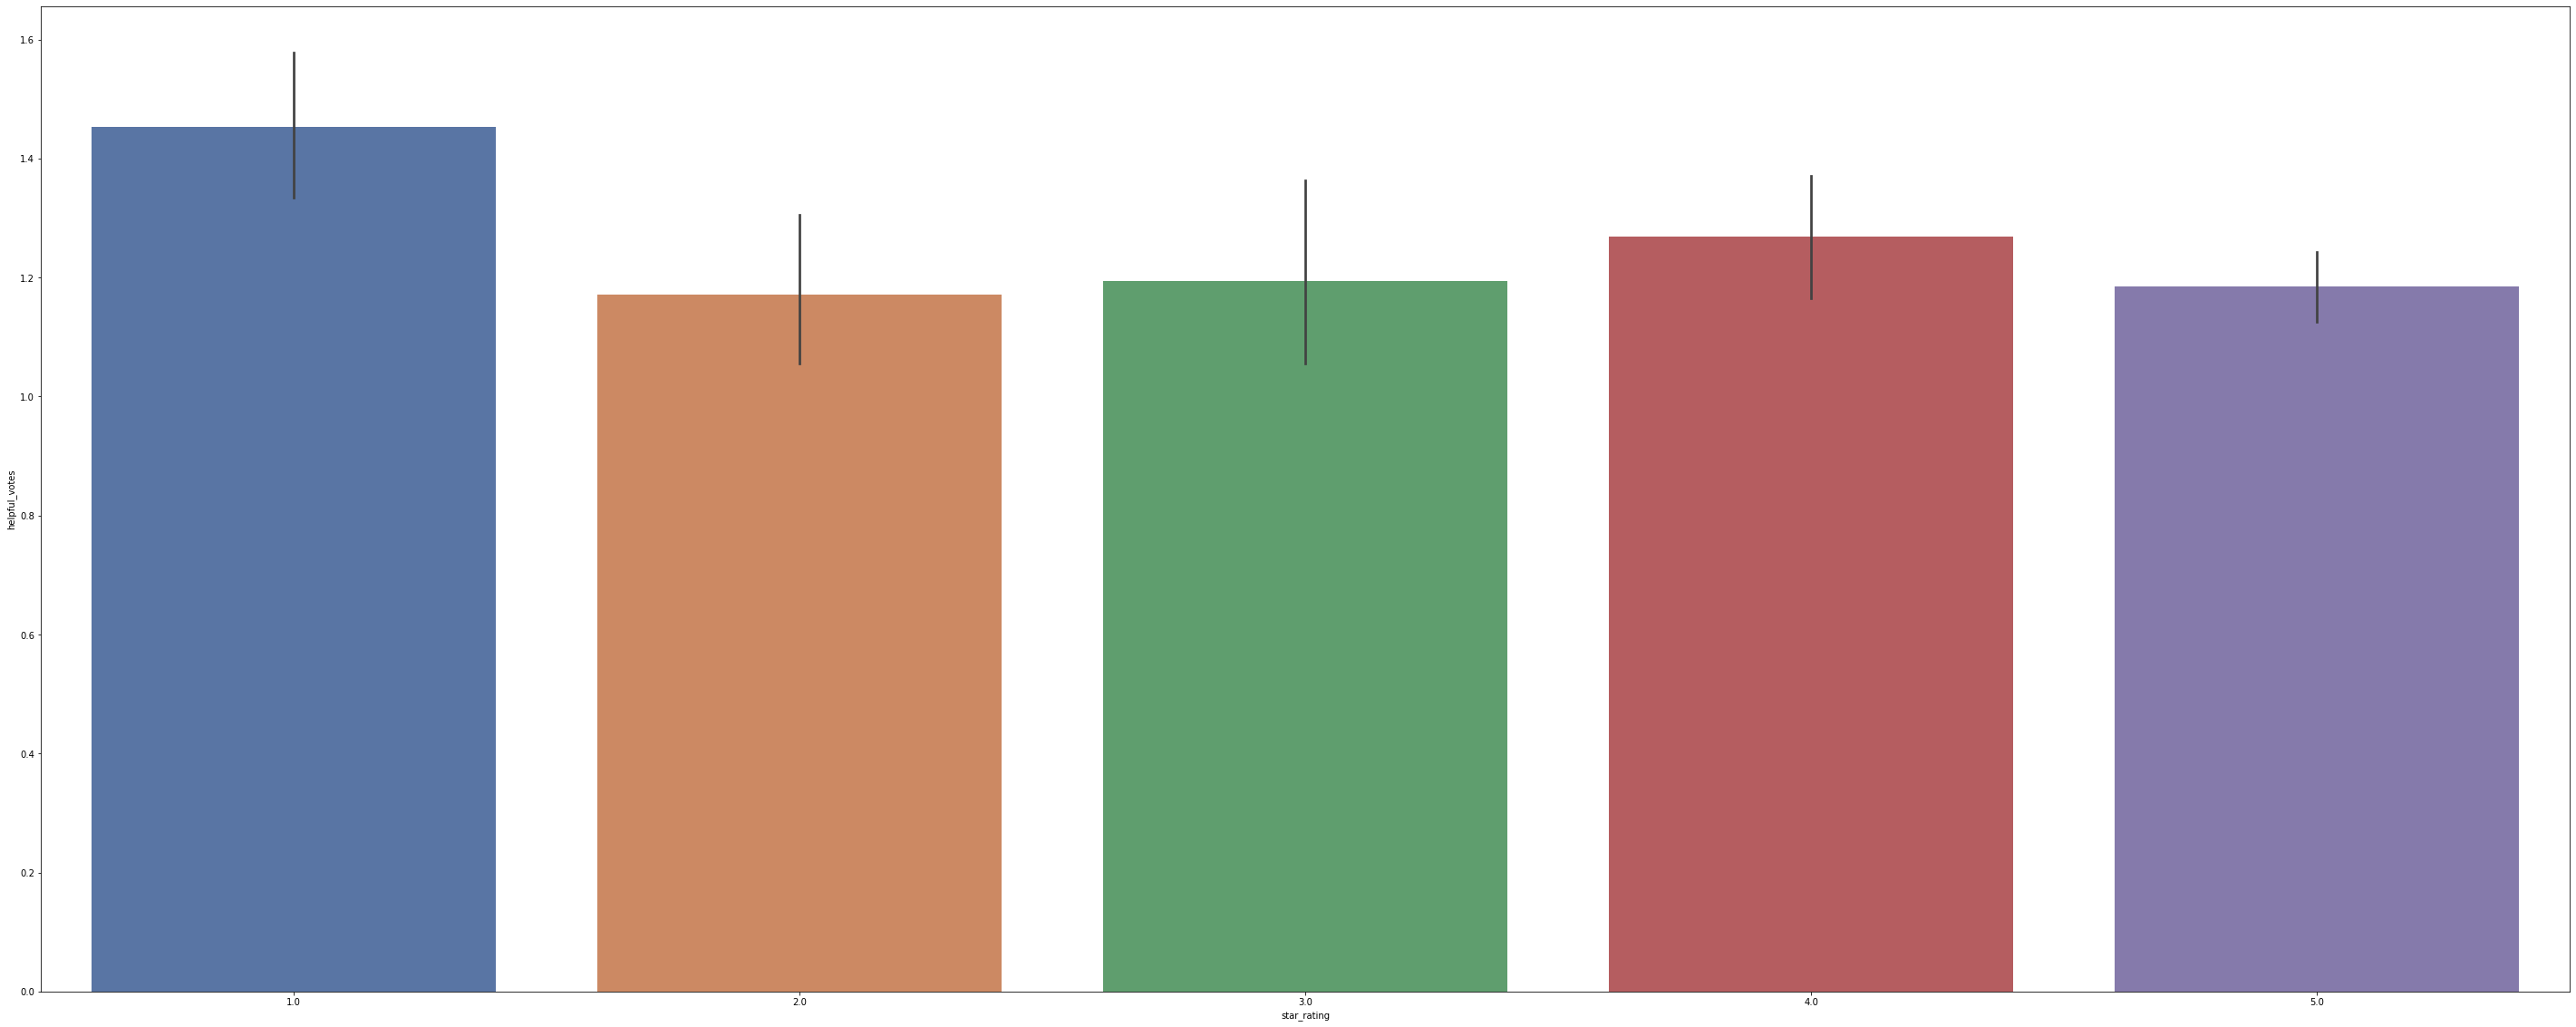

In [15]:
## Exploring ralationship between star rating and helpful votes

plt.figure(figsize= (50,20))
sns.barplot(x = 'star_rating', y = 'helpful_votes', data= df_mobile, palette= 'deep')

### Preprocessing
##### Handling Nan column

In [16]:
#To get an helpful_rates; we divide helpful_votes by total_votes
df_mobile['helpful_rates'] = df_mobile.helpful_votes.div(df_mobile.total_votes).round(2) 
df_mobile

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rates
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,NaN
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31,0.00
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,NaN
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31,NaN
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104847,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,23.0,27.0,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",2002-04-03,0.85
104848,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,10.0,11.0,N,N,Well worth [it],We live in an apartment with hardwood floors a...,2002-03-05,0.91
104849,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,13.0,13.0,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2002-02-19,1.00
104850,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,58.0,61.0,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,2002-01-06,0.95


In [17]:
# We noticed from the column of helpful rate during the division it returned Nan
# So we are going to relace the Nan values with 0 
df_mobile['helpful_rates'] = df_mobile['helpful_rates'].fillna(0)

In [18]:
df_mobile.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rates
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,0.0
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31,0.0
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,0.0
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31,0.0
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,0.0


Text(0, 0.5, 'Frequency')

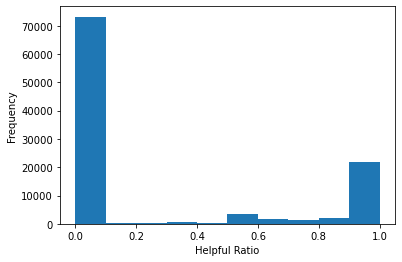

In [19]:
## Hist Checking the helpful_votes
plt.hist(df_mobile['helpful_rates'])
plt.xlabel('Helpful Ratio')
plt.ylabel('Frequency')

In [21]:
df_mobile['helpful_rates'].value_counts()

0.00    73115
1.00    20737
0.50     3047
0.67     1450
0.75      836
        ...  
0.47        1
0.28        1
0.01        1
0.34        1
0.49        1
Name: helpful_rates, Length: 100, dtype: int64

In [22]:
df_mobile['helpful_rates'].describe()

count    104847.000000
mean          0.262820
std           0.416554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.670000
max           1.000000
Name: helpful_rates, dtype: float64

In [23]:
df_mobile.shape

(104847, 16)

##### Text Processing

In [24]:
#From Reviews; Make text lowercase, remove text in square brackets,remove links,, Non Ascii text, remove punctuation
#and remove words containing numbers.

def copy_app(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
    text = re.sub(r"\s+"," ", text, flags = re.I)
    return text

In [26]:
# Applying the fucntion to review_body and review review_headline
df_mobile['review_body'] = df_mobile['review_body'].apply(lambda x:copy_app(x))
df_mobile['review_headline'] = df_mobile['review_headline'].apply(lambda x:copy_app(x))

In [28]:
## Httm
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [29]:
# Applying the fucntion review_body and review_headline
df_mobile['review_body'] = df_mobile['review_body'].apply(lambda x: remove_html(x))
df_mobile['review_headline'] = df_mobile['review_headline'].apply(lambda x: remove_html(x))

In [30]:
# Function to remove special characters, symbols,emojis and graphic characters

def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [31]:
# Applying the fucntion review_body
df_mobile['review_body'] = df_mobile['review_body'].apply(lambda x:remove_special_characters(x))
df_mobile['review_headline'] = df_mobile['review_headline'].apply(lambda x:remove_special_characters(x))

In [33]:
# Removing stopwords from review body
from nltk.corpus import stopwords


stop_words = stopwords.words('english')

df_mobile['review_body'] = df_mobile['review_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_mobile['review_headline'] = df_mobile['review_headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_mobile.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rates
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,happy,advertised everything works perfectly im happy...,2015-08-31,0.0
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,great,2015-08-31,0.0
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,work great fit life proof case iphone,2015-08-31,0.0
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,work well couldnt get used hearing,work well couldnt get used hearing anything ea...,2015-08-31,0.0
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,cameras battery issues,careful products bought several cameras image ...,2015-08-31,0.0


### Features Extraction

#### Extracting Helpfulness Feature
##### Based on the previous research papers, we are setting a threashold ,by creating and helfulness column,
##### Any helpful rate above 60% as helpful and below as not  helpful as classes of 1 and 0.
##### Helpful is 1 and unhelpful is 0


In [34]:
## Creating a new column of helpfulness for the two classes of helpful and unhelpful 1 and 0
df_mobile['helpfulness']=np.where(df_mobile['helpful_rates']>=0.6,1,0)
df_mobile['helpfulness'].value_counts()

0    78054
1    26793
Name: helpfulness, dtype: int64

Text(0, 0.5, 'Frequency')

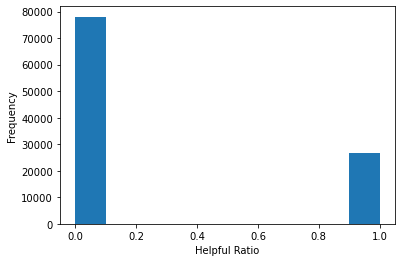

In [35]:
## New Hist of new helpfulness
plt.hist(df_mobile['helpfulness'])
plt.xlabel('Helpful Ratio')
plt.ylabel('Frequency')


In [36]:
df_mobile.shape

(104847, 17)

##### Extracting Review sentiment Features

In [37]:

# Creating a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df_mobile['subjectivity'] = df_mobile['review_body'].apply(getSubjectivity)
df_mobile['polarity'] = df_mobile['review_body'].apply(getPolarity)
df_mobile['s_subjectivity'] = df_mobile['review_headline'].apply(getSubjectivity)
df_mobile['s_polarity'] = df_mobile['review_headline'].apply(getPolarity)

In [38]:
#Creating a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df_mobile['sentiment'] = df_mobile['polarity'].apply(getAnalysis)
df_mobile['s_sentiment'] = df_mobile['s_polarity'].apply(getAnalysis)
df_mobile

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_body,review_date,helpful_rates,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,...,advertised everything works perfectly im happy...,2015-08-31,0.00,0,1.000000,0.800000,1.000000,0.800000,Positive,Positive
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,...,great,2015-08-31,0.00,0,0.750000,0.800000,0.000000,0.000000,Positive,Neutral
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,...,work great fit life proof case iphone,2015-08-31,0.00,0,0.575000,0.600000,0.750000,0.800000,Positive,Positive
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,...,work well couldnt get used hearing anything ea...,2015-08-31,0.00,0,0.000000,0.000000,0.000000,0.000000,Neutral,Neutral
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,...,careful products bought several cameras image ...,2015-08-31,0.00,0,0.666667,0.079167,0.000000,0.000000,Positive,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104847,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,23.0,27.0,...,ive looking purrfect solution clean inevitable...,2002-04-03,0.85,1,0.513492,0.080122,0.000000,0.000000,Positive,Neutral
104848,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,10.0,11.0,...,live apartment hardwood floors carpets wanted ...,2002-03-05,0.91,1,0.493333,0.157424,0.100000,0.300000,Positive,Positive
104849,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,13.0,13.0,...,received birthday present best dog cat rats ye...,2002-02-19,1.00,1,0.335000,0.255000,0.000000,0.000000,Positive,Neutral
104850,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,58.0,61.0,...,got dirt devil spot scrubber gift christmas tw...,2002-01-06,0.95,1,0.501048,0.154238,0.000000,0.000000,Positive,Neutral


In [39]:
# Value counts for sentiment column
df_mobile['sentiment'].value_counts()

Positive    85167
Negative    12134
Neutral      7548
Name: sentiment, dtype: int64

In [39]:
# Value counts for reviews date column
df_mobile['review_date'].value_counts()

2011-11-09    229
2012-12-28    176
2015-01-05    153
2012-12-27    145
2015-01-08    138
             ... 
2005-02-15      1
2007-07-26      1
2004-05-08      1
2008-04-30      1
2004-08-21      1
Name: review_date, Length: 3718, dtype: int64

In [41]:
# Value counts for Vine column
df_mobile['vine'].value_counts()

N    104829
Y        18
Name: vine, dtype: int64

In [42]:
## Dropping all columns that we are not going to be using in this project
df_mobile = df_mobile.drop(['marketplace', 'customer_id','review_id', 'product_parent', 'product_id',
                            'product_category', 'product_title', 'helpful_votes','total_votes', 
                            'helpful_rates', 'review_date'], axis=1)


In [43]:
df_mobile.head()

,star_rating,vine,verified_purchase,review_headline,review_body,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment
0,5.0,N,Y,happy,advertised everything works perfectly im happy...,0,1.000000,0.800000,1.00,0.8,Positive,Positive
1,5.0,N,Y,five star,great,0,0.750000,0.800000,0.00,0.0,Positive,Neutral
2,5.0,N,Y,great cables,work great fit life proof case iphone,0,0.575000,0.600000,0.75,0.8,Positive,Positive
3,4.0,N,Y,work well couldnt get used hearing,work well couldnt get used hearing anything ea...,0,0.000000,0.000000,0.00,0.0,Neutral,Neutral
4,2.0,N,Y,cameras battery issues,careful products bought several cameras image ...,0,0.666667,0.079167,0.00,0.0,Positive,Neutral


In [44]:
# Here we move the review body to the first column 
mid = df_mobile['review_body']
df_mobile.drop(labels=['review_body'], axis=1, inplace = True)
df_mobile.insert(0, 'review_body', mid)
df_mobile

,review_body,star_rating,vine,verified_purchase,review_headline,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment
0,advertised everything works perfectly im happy...,5.0,N,Y,happy,0,1.000000,0.800000,1.000000,0.800000,Positive,Positive
1,great,5.0,N,Y,five star,0,0.750000,0.800000,0.000000,0.000000,Positive,Neutral
2,work great fit life proof case iphone,5.0,N,Y,great cables,0,0.575000,0.600000,0.750000,0.800000,Positive,Positive
3,work well couldnt get used hearing anything ea...,4.0,N,Y,work well couldnt get used hearing,0,0.000000,0.000000,0.000000,0.000000,Neutral,Neutral
4,careful products bought several cameras image ...,2.0,N,Y,cameras battery issues,0,0.666667,0.079167,0.000000,0.000000,Positive,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
104847,ive looking purrfect solution clean inevitable...,5.0,N,N,cat barf gone,1,0.513492,0.080122,0.000000,0.000000,Positive,Neutral
104848,live apartment hardwood floors carpets wanted ...,5.0,N,N,well worth,1,0.493333,0.157424,0.100000,0.300000,Positive,Positive
104849,received birthday present best dog cat rats ye...,5.0,N,N,time saver,1,0.335000,0.255000,0.000000,0.000000,Positive,Neutral
104850,got dirt devil spot scrubber gift christmas tw...,5.0,N,N,got stains,1,0.501048,0.154238,0.000000,0.000000,Positive,Neutral


In [45]:
from nltk import pos_tag, pos_tag_sents
import string

#!pip install readability
import sys
sys.path = [
    '../input/readability-package',
] + sys.path
import readability
import spacy

##### Extracting Readability and Review structure Features
##### We are using Textstat to calculate statistics from review body to determine readability, and grade level

In [46]:
## Here we are extracting 9 readability features from the review_body which have been considered
## best importances from previous papers.

df_mobile['character_count'] = df_mobile['review_body'].apply(lambda x: len(str(x)))
df_mobile['word_count'] = df_mobile['review_body'].apply(textstat.lexicon_count)
df_mobile['s_word_count'] = df_mobile['review_headline'].apply(textstat.lexicon_count)
df_mobile['unique_word_count'] = df_mobile['review_body'].apply(lambda x: len(set(str(x).split())))
df_mobile['syllable_count'] = df_mobile['review_body'].apply(textstat.syllable_count)
df_mobile['flesch_reading_ease'] = df_mobile['review_body'].apply(textstat.flesch_reading_ease)
df_mobile['flesch_kincaid_grade'] = df_mobile['review_body'].apply(textstat.flesch_kincaid_grade)
df_mobile['automated_readability_index'] = df_mobile['review_body'].apply(textstat.automated_readability_index)
df_mobile['coleman_liau_index'] = df_mobile['review_body'].apply(textstat.coleman_liau_index)
df_mobile['linsear_write_formula'] = df_mobile['review_body'].apply(textstat.linsear_write_formula)
df_mobile['dale_chall_readability_score'] = df_mobile['review_body'].apply(textstat.dale_chall_readability_score)

features = [
    'character_count',
    'word_count',
    's_word_count',
    'unique_word_count',
    'syllable_count',
    'flesch_reading_ease',
    'flesch_kincaid_grade',
    'automated_readability_index',
    'coleman_liau_index',
    'linsear_write_formula',
    'dale_chall_readability_score'
]


In [47]:
df_mobile.head()

,review_body,star_rating,vine,verified_purchase,review_headline,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,...,word_count,s_word_count,unique_word_count,syllable_count,flesch_reading_ease,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score
0,advertised everything works perfectly im happy...,5.0,N,Y,happy,0,1.000000,0.800000,1.00,0.8,...,15,1,14,27,39.33,11.5,11.2,13.04,11.5,9.64
1,great,5.0,N,Y,five star,0,0.750000,0.800000,0.00,0.0,...,1,2,1,1,121.22,-3.5,2.6,-16.41,-0.5,0.05
2,work great fit life proof case iphone,5.0,N,Y,great cables,0,0.575000,0.600000,0.75,0.8,...,7,2,7,7,115.13,-1.2,2.9,5.75,2.5,8.50
3,work well couldnt get used hearing anything ea...,4.0,N,Y,work well couldnt get used hearing,0,0.000000,0.000000,0.00,0.0,...,9,6,9,12,87.72,3.3,7.7,11.22,3.5,7.59
4,careful products bought several cameras image ...,2.0,N,Y,cameras battery issues,0,0.666667,0.079167,0.00,0.0,...,12,3,12,22,42.38,10.3,14.0,18.08,6.0,12.13


##### Extracting Syntactic Features
###### Here we are using NLTK  part - of - speech (POS) tagger to each words in the review body.

In [48]:
# Function to extract Syntactic Features
# Here we are extracting 4 features, noun_count, verb_count, adv_count, and adj_count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    tags = nltk.pos_tag(nltk.word_tokenize(x))
    count = 0
    for tag in tags:
        tag = tag[1]
        if tag in pos_dic[flag]:
            count += 1
    return count



In [49]:
df_mobile['noun_count'] = df_mobile['review_body'].apply(lambda x: pos_check(x, 'noun'))

In [50]:
df_mobile['verb_count'] = df_mobile['review_body'].apply(lambda x: pos_check(x, 'verb'))

In [51]:
df_mobile['adv_count'] = df_mobile['review_body'].apply(lambda  x: pos_check(x, 'adv'))

In [52]:
df_mobile['adj_count'] = df_mobile['review_body'].apply(lambda x: pos_check(x, 'adj'))

In [53]:
df_mobile.head()

,review_body,star_rating,vine,verified_purchase,review_headline,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,...,flesch_reading_ease,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count
0,advertised everything works perfectly im happy...,5.0,N,Y,happy,0,1.000000,0.800000,1.00,0.8,...,39.33,11.5,11.2,13.04,11.5,9.64,6,4,1,1
1,great,5.0,N,Y,five star,0,0.750000,0.800000,0.00,0.0,...,121.22,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1
2,work great fit life proof case iphone,5.0,N,Y,great cables,0,0.575000,0.600000,0.75,0.8,...,115.13,-1.2,2.9,5.75,2.5,8.50,5,0,0,2
3,work well couldnt get used hearing anything ea...,4.0,N,Y,work well couldnt get used hearing,0,0.000000,0.000000,0.00,0.0,...,87.72,3.3,7.7,11.22,3.5,7.59,3,3,1,2
4,careful products bought several cameras image ...,2.0,N,Y,cameras battery issues,0,0.666667,0.079167,0.00,0.0,...,42.38,10.3,14.0,18.08,6.0,12.13,6,2,1,3


In [54]:
for col in df_mobile.columns:
    print(col)

review_body
star_rating
vine
verified_purchase
review_headline
helpfulness
subjectivity
polarity
s_subjectivity
s_polarity
sentiment
s_sentiment
character_count
word_count
s_word_count
unique_word_count
syllable_count
flesch_reading_ease
flesch_kincaid_grade
automated_readability_index
coleman_liau_index
linsear_write_formula
dale_chall_readability_score
noun_count
verb_count
adv_count
adj_count


In [55]:
# Encoding, vine, verified_purchase, sentiment columns to be able to fit into the model
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_mobile[['vine', 'verified_purchase', 'sentiment', 's_sentiment']] = df_mobile[['vine', 'verified_purchase', 'sentiment', 's_sentiment']].apply(le.fit_transform)

In [56]:
df_mobile.head()

,review_body,star_rating,vine,verified_purchase,review_headline,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,...,flesch_reading_ease,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count
0,advertised everything works perfectly im happy...,5.0,0,1,happy,0,1.000000,0.800000,1.00,0.8,...,39.33,11.5,11.2,13.04,11.5,9.64,6,4,1,1
1,great,5.0,0,1,five star,0,0.750000,0.800000,0.00,0.0,...,121.22,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1
2,work great fit life proof case iphone,5.0,0,1,great cables,0,0.575000,0.600000,0.75,0.8,...,115.13,-1.2,2.9,5.75,2.5,8.50,5,0,0,2
3,work well couldnt get used hearing anything ea...,4.0,0,1,work well couldnt get used hearing,0,0.000000,0.000000,0.00,0.0,...,87.72,3.3,7.7,11.22,3.5,7.59,3,3,1,2
4,careful products bought several cameras image ...,2.0,0,1,cameras battery issues,0,0.666667,0.079167,0.00,0.0,...,42.38,10.3,14.0,18.08,6.0,12.13,6,2,1,3


In [57]:
df_mobile = df_mobile.drop(['review_headline'], axis=1)

In [58]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104847 entries, 0 to 104851
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_body                   104847 non-null  object 
 1   star_rating                   104847 non-null  float64
 2   vine                          104847 non-null  int64  
 3   verified_purchase             104847 non-null  int64  
 4   helpfulness                   104847 non-null  int64  
 5   subjectivity                  104847 non-null  float64
 6   polarity                      104847 non-null  float64
 7   s_subjectivity                104847 non-null  float64
 8   s_polarity                    104847 non-null  float64
 9   sentiment                     104847 non-null  int64  
 10  s_sentiment                   104847 non-null  int64  
 11  character_count               104847 non-null  int64  
 12  word_count                    104847 non-nul

In [59]:
# df_mobile.to_csv('Amazon_mobile_features.csv',index=False)